# 0. Introduction
Open University is a public British University that also has the highest number of undergraduate students in the UK. It is the largest academic institution in the United Kingdom (and one of the largest in Europe) with 2 Million enrolled students since it is established at 1969. As can be understood from its name, Open University mainly populated by off-campus students.

This dataset belongs to Open University Online Learning Platform (Also called as "Virtual Learning Environment(VLE)") that off-campus students use for accessing the course content, forum discussions, sending assessments and checking out assignment marks etc. It consists of 7 selected courses. Different presentations indicated with letters "B" and "J" after year for semester 2 and semester 1 respectively.

![](https://www.googleapis.com/download/storage/v1/b/kaggle-user-content/o/inbox%2F1880515%2F864453733ec7cb92f003450ed38a2144%2FScreen%20Shot%202020-01-11%20at%208.41.59%20pm.png?generation=1578735825723455&alt=media)



# 1. Data Description
Data columns description
### 1.1 courses.csv
- **code_module**: code name of the module (known as unit code in many universities), which serves as the identifier.

- **code_presentation**: code name of the presentation. It consists of the year and “B” for the presentation starting in February (Corresponds to Semester2) and “J” for the presentation starting in October(Corresponds to Semester1).

- **module_presentation**: Length of the module-presentation in days.

### 1.2 assessments.csv
- **code_module**: code name of the module (known as unit code in many universities), which serves as the identifier.

- **code_presentation**: code name of the presentation. It consists of the year and “B” for the presentation starting in February (Corresponds to Semester2) and “J” for the presentation starting in October(Corresponds to Semester1).

- **id_assessment**: Identification number of the assessment.
  
- **assesment_type**: Three types of assessments exist: Tutor Marked Assessment (TMA), Computer Marked Assessment (CMA) and Final Exam (Exam).
  
- **date**: Information about the final submission date of the assessment calculated as the number of days since the start of the module-presentation. The starting date of the presentation has number 0 (zero).
  
- **weight**: Weight of the assessment in %. Typically, Exams are treated separately and have the weight 100%; the sum of all other assessments is 100%.

### 1.3 studentAssessment.csv
- **student_assesment**: The identification number of the assessment.
- **id_student**: A unique identification number for the student.
- **date_submitted**: The date of student submission, measured as the number of days since the start of the module presentation.
- **is_banked**: A status flag indicating that the assessment result has been transferred from a previous presentation.
- **score**: The student’s score in this assessment. The range is from 0 to 100. The score lower than 40 is interpreted as Fail. The marks are in the range from 0 to 100.


### 1.4 studentInfo.csv
- **code_module**: code name of the module (known as unit code in many universities), which serves as the identifier.

- **code_presentation**: code name of the presentation. It consists of the year and “B” for the presentation starting in February (Corresponds to Semester2) and “J” for the presentation starting in October(Corresponds to Semester1).

- **id_student**: A unique identification number for the student.
- **gender**: gender of a student
- **region**: Identifies the geographic region, where the student lived while taking the module-presentation.
- **highest_education**: Highest student education level on entry to the module presentation.
- **imd_band**: Specifies the Index of Multiple Depravation band of the place where the student lived during the module-presentation.
- **age_band**: Band of the student’s age.
- **num_of_prev_attempts**: The number times the student has attempted this module.
- **studied_credits**: The total number of credits for the modules the student is currently studying.
### 1.5 studentRegistration.csv
- **date_registration**: The date of student’s registration on the module presentation, this is the number of days measured relative to the start of the module-presentation. Students, who completed the course have this field empty. Students who unregistered have Withdrawal as the value of the final_result column in the studentInfo.csv file.
- **date_unregistration**: Date of student unregistration from the module presentation, this is the number of days measured relative to the start of the module-presentation. Students, who completed the course have this field empty. Students who unregistered have Withdrawal as the value of the final_result column in the studentInfo.csv file.
### 1.6 studentVle.csv
- **id_site**: An identification number for the VLE material.
- **date**: The date of student’s interaction with the material measured as the number of days since the start of the module
- **sum_click**: The number of times a student interacts with the material in that day.
### 1.7 vle.csv
- **activity_type**: The role associated with the module material.
- **week_from**: The week from which the material is planned to be used.
- **week_to**: Week until which the material is planned to be used.


# 2. Importing Modules and Reading Data

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [45]:
df = pd.read_csv("merged.csv", index_col=0)

In [46]:
df.head()

,id_student,code_module,code_presentation,activity_type,sum,count,id_assessment,assessment_type,date,weight,date_submitted,is_banked,score,date_registration,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation_length,study_status,withdrawal_status
0,6516,AAA,2014J,dataplus,21,4,1758,TMA,19.0,10.0,17,0,60.0,-52.0,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass,269,finished,didn't withdraw
1,6516,AAA,2014J,dataplus,21,4,1759,TMA,54.0,20.0,51,0,48.0,-52.0,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass,269,finished,didn't withdraw
2,6516,AAA,2014J,dataplus,21,4,1760,TMA,117.0,20.0,116,0,63.0,-52.0,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass,269,finished,didn't withdraw
3,6516,AAA,2014J,dataplus,21,4,1761,TMA,166.0,20.0,164,0,61.0,-52.0,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass,269,finished,didn't withdraw
4,6516,AAA,2014J,dataplus,21,4,1762,TMA,215.0,30.0,210,0,77.0,-52.0,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass,269,finished,didn't withdraw


In [47]:
df.describe()

,id_student,sum,count,id_assessment,date,weight,date_submitted,is_banked,score,date_registration,num_of_prev_attempts,studied_credits,module_presentation_length
count,1.500683e+06,1.500683e+06,1.500683e+06,1.500683e+06,1.500683e+06,1.500683e+06,1.500683e+06,1.500683e+06,1.500683e+06,1.500683e+06,1.500683e+06,1.500683e+06,1.500683e+06
mean,7.109235e+05,2.109969e+02,5.500902e+01,2.769969e+04,1.356615e+02,1.127252e+01,1.154580e+02,7.282018e-03,7.638217e+01,-6.715035e+01,1.417648e-01,7.826802e+01,2.554769e+02
std,5.609607e+05,4.640620e+02,8.499146e+01,8.577082e+03,7.937158e+01,1.404301e+01,7.063811e+01,8.502349e-02,1.806847e+01,4.683449e+01,4.399806e-01,3.677672e+01,1.360531e+01
min,6.516000e+03,1.000000e+00,1.000000e+00,1.752000e+03,1.200000e+01,0.000000e+00,-1.100000e+01,0.000000e+00,0.000000e+00,-3.110000e+02,0.000000e+00,3.000000e+01,2.340000e+02
25%,5.036680e+05,1.100000e+01,7.000000e+00,2.428700e+04,5.400000e+01,0.000000e+00,5.100000e+01,0.000000e+00,6.700000e+01,-9.500000e+01,0.000000e+00,6.000000e+01,2.400000e+02
50%,5.838240e+05,4.800000e+01,2.400000e+01,3.071600e+04,1.310000e+02,9.000000e+00,1.160000e+02,0.000000e+00,8.000000e+01,-5.400000e+01,0.000000e+00,6.000000e+01,2.620000e+02
75%,6.350430e+05,1.990000e+02,6.700000e+01,3.488700e+04,2.220000e+02,1.800000e+01,1.720000e+02,0.000000e+00,8.900000e+01,-2.900000e+01,0.000000e+00,9.000000e+01,2.680000e+02
max,2.698588e+06,1.315400e+04,1.727000e+03,3.744300e+04,2.610000e+02,1.000000e+02,6.080000e+02,1.000000e+00,1.000000e+02,1.240000e+02,6.000000e+00,6.300000e+02,2.690000e+02


In [48]:
df.shape

(1500683, 26)

In [49]:
df.isnull().sum()

id_student                    0
code_module                   0
code_presentation             0
activity_type                 0
sum                           0
count                         0
id_assessment                 0
assessment_type               0
date                          0
weight                        0
date_submitted                0
is_banked                     0
score                         0
date_registration             0
gender                        0
region                        0
highest_education             0
imd_band                      0
age_band                      0
num_of_prev_attempts          0
studied_credits               0
disability                    0
final_result                  0
module_presentation_length    0
study_status                  0
withdrawal_status             0
dtype: int64

# Feature Engineering

In [50]:
df['assessment_engagement_score'] = df['sum'] * df['count']
df['submission_timeliness'] = df['date_submitted'] - df['date']
df['score_per_weight'] = df['score'] / (df['weight'] + 1)
df['module_engagement_rate'] = df['sum'] / df['module_presentation_length']

In [51]:
df['repeat_student'] = df['num_of_prev_attempts'].apply(lambda x: 1 if x > 0 else 0)
df['performance_by_registration'] = df['score'] / (df['date_registration'] + 1)
df['banked_assessment_ratio'] = df.groupby('id_student')['is_banked'].transform(lambda x: x.sum() / x.count())
df['time_since_registration'] = df['date'] - df['date_registration']
df['weighted_engagement'] = df['assessment_engagement_score'] * df['weight']
df['cumulative_score'] = df.groupby('id_student')['score'].cumsum()

In [52]:
df['engagement_consistency'] = df.groupby('id_student')['sum'].transform(np.std)
df['learning_pace'] = df.groupby('id_student')['date_submitted'].diff().fillna(0)
df['engagement_dropoff'] = df.groupby('id_student')['sum'].transform(lambda x: (x.max() - x.min()) / (x.count() - 1) if x.count() > 1 else 0)
df['activity_diversity'] = df.groupby('id_student')['activity_type'].transform('nunique')

In [53]:
df['improvement_rate'] = df.groupby('id_student')['score'].transform(lambda x: (x.iloc[-1] - x.iloc[0]) / (x.count() - 1) if x.count() > 1 else 0)

In [54]:
def determine_study_method(activity_type_counts):
    threshold = 5
    
    poor_conditions = (
        activity_type_counts.get('homepage', 0) < threshold and
        activity_type_counts.get('subpage', 0) < threshold and
        activity_type_counts.get('resource', 0) < threshold and
        activity_type_counts.get('forumng', 0) < threshold and
        activity_type_counts.get('oucontent', 0) < threshold and
        activity_type_counts.get('url', 0) < threshold and
        activity_type_counts.get('quiz', 0) < threshold and
        activity_type_counts.get('ouwiki', 0) < threshold and
        activity_type_counts.get('oucollaborate', 0) < threshold and
        activity_type_counts.get('page', 0) < threshold and
        activity_type_counts.get('glossary', 0) < threshold and
        activity_type_counts.get('questionnaire', 0) < threshold and
        activity_type_counts.get('dualpane', 0) < threshold and
        activity_type_counts.get('dataplus', 0) < threshold and
        activity_type_counts.get('externalquiz', 0) < threshold and
        activity_type_counts.get('ouelluminate', 0) < threshold and
        activity_type_counts.get('folder', 0) < threshold and
        activity_type_counts.get('htmlactivity', 0) < threshold and
        activity_type_counts.get('sharedsubpage', 0) < threshold and
        activity_type_counts.get('repeatactivity', 0) < threshold
    )
    
    
    interactive_conditions = (
        (activity_type_counts.get('quiz', 0) > threshold and
        activity_type_counts.get('externalquiz', 0) > threshold) or
        activity_type_counts.get('repeatactivity', 0) > threshold or
        activity_type_counts.get('questionnaire', 0) > threshold
    )
    
    resource_based_conditions = (
        activity_type_counts.get('resource', 0) > threshold or
        activity_type_counts.get('homepage', 0) > threshold or
        activity_type_counts.get('folder', 0) > threshold or
        activity_type_counts.get('subpage', 0) > threshold or
        activity_type_counts.get('url', 0) > threshold or
        activity_type_counts.get('page', 0) > threshold or
        activity_type_counts.get('glossary', 0) > threshold or
        activity_type_counts.get('dataplus', 0) > threshold or
        activity_type_counts.get('dualpane', 0) > threshold or
        activity_type_counts.get('htmlactivity', 0) > threshold
    )
    
    collaborative_conditions = (
        activity_type_counts.get('ouelluminate', 0) > threshold or
        activity_type_counts.get('ouwiki', 0) > threshold or
        activity_type_counts.get('sharedsubpage', 0) > threshold or
        activity_type_counts.get('oucontent', 0) > threshold or
        activity_type_counts.get('page', 0) > threshold or
        activity_type_counts.get('oucollaborate', 0) > threshold
    )
    
    
    if poor_conditions and not (collaborative_conditions or interactive_conditions or resource_based_conditions):
        return 'Offline Content'    
    elif collaborative_conditions and not interactive_conditions:
        return 'Collaborative'
    elif resource_based_conditions and not (collaborative_conditions or interactive_conditions):
        return 'Resource-Based'
    elif interactive_conditions:
        return 'Interactive'
    else:
        return 'Informational'

activity_type_counts = df.groupby('id_student')['activity_type'].value_counts().unstack().fillna(0)

activity_type_counts['study_method_preference'] = activity_type_counts.apply(determine_study_method, axis=1)

if 'study_method_preference' in df.columns:
    df = df.drop(columns=['study_method_preference'])

df = df.merge(activity_type_counts[['study_method_preference']], on='id_student', how='left')

df.head()


,id_student,code_module,code_presentation,activity_type,sum,count,id_assessment,assessment_type,date,weight,date_submitted,is_banked,score,date_registration,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,module_presentation_length,study_status,withdrawal_status,assessment_engagement_score,submission_timeliness,score_per_weight,module_engagement_rate,repeat_student,performance_by_registration,banked_assessment_ratio,time_since_registration,weighted_engagement,cumulative_score,engagement_consistency,learning_pace,engagement_dropoff,activity_diversity,improvement_rate,study_method_preference
0,6516,AAA,2014J,dataplus,21,4,1758,TMA,19.0,10.0,17,0,60.0,-52.0,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass,269,finished,didn't withdraw,84,-2.0,5.454545,0.078067,0,-1.176471,0.0,71.0,840.0,60.0,491.833818,0.0,43.647059,7,0.5,Informational
1,6516,AAA,2014J,dataplus,21,4,1759,TMA,54.0,20.0,51,0,48.0,-52.0,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass,269,finished,didn't withdraw,84,-3.0,2.285714,0.078067,0,-0.941176,0.0,106.0,1680.0,108.0,491.833818,34.0,43.647059,7,0.5,Informational
2,6516,AAA,2014J,dataplus,21,4,1760,TMA,117.0,20.0,116,0,63.0,-52.0,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass,269,finished,didn't withdraw,84,-1.0,3.000000,0.078067,0,-1.235294,0.0,169.0,1680.0,171.0,491.833818,65.0,43.647059,7,0.5,Informational
3,6516,AAA,2014J,dataplus,21,4,1761,TMA,166.0,20.0,164,0,61.0,-52.0,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass,269,finished,didn't withdraw,84,-2.0,2.904762,0.078067,0,-1.196078,0.0,218.0,1680.0,232.0,491.833818,48.0,43.647059,7,0.5,Informational
4,6516,AAA,2014J,dataplus,21,4,1762,TMA,215.0,30.0,210,0,77.0,-52.0,M,Scotland,HE Qualification,80-90%,55<=,0,60,N,Pass,269,finished,didn't withdraw,84,-5.0,2.483871,0.078067,0,-1.509804,0.0,267.0,2520.0,309.0,491.833818,46.0,43.647059,7,0.5,Informational


In [55]:
df.study_method_preference.value_counts()

study_method_preference
Collaborative      739761
Interactive        495220
Offline Content    140222
Informational       99913
Resource-Based      25567
Name: count, dtype: int64

In [56]:
summary_columns = {
    'code_module': lambda x: x.mode()[0],
    'code_presentation': lambda x: x.mode()[0],
    'activity_type': lambda x: x.mode()[0],
    'sum': 'sum',
    'count': 'sum',
    'assessment_type': lambda x: x.mode()[0],
    'date': 'mean',
    'weight': 'mean',
    'date_submitted':'mean',
    'is_banked': lambda x: x.mode()[0],
    'score':'mean',
    'date_registration':'mean',
    'gender': lambda x: x.mode()[0],
    'region': lambda x: x.mode()[0],
    'highest_education': lambda x: x.mode()[0],
    'imd_band' : lambda x: x.mode()[0],
    'age_band': lambda x: x.mode()[0],
    'num_of_prev_attempts': 'mean',
    'studied_credits': 'mean',
    'disability': lambda x: x.mode()[0],
    'final_result': lambda x: x.mode()[0],
    'module_presentation_length': 'mean',
    'study_status': lambda x: x.mode()[0],
    'withdrawal_status': lambda x: x.mode()[0],
    'assessment_engagement_score': 'mean',
    'submission_timeliness': 'mean',
    'score_per_weight': 'mean',
    'module_engagement_rate':'mean',
    'repeat_student': 'mean',
    'performance_by_registration': 'mean',
    'banked_assessment_ratio': 'mean',
    'time_since_registration': 'mean',
    'weighted_engagement': 'mean',
    'cumulative_score': 'mean',
    'engagement_consistency': 'mean',
    'learning_pace': 'mean',
    'engagement_dropoff': 'mean',
    'activity_diversity': 'mean',
    'improvement_rate': 'mean',
    'study_method_preference': lambda x: x.mode()[0]
}

# Group by 'id_student' and aggregate
summary_df = df.groupby('id_student').agg(summary_columns).reset_index()

In [57]:
ids = summary_df["id_student"]
study_method = summary_df["study_method_preference"]

In [58]:
columns_to_work_with = ['activity_type','sum','count','score','gender','region','highest_education','imd_band','age_band'
           ,'num_of_prev_attempts','disability','final_result','study_status','withdrawal_status','assessment_engagement_score'
           ,'submission_timeliness','score_per_weight','module_engagement_rate','repeat_student','performance_by_registration'
           ,'weighted_engagement','cumulative_score','engagement_consistency','learning_pace','engagement_dropoff'
           ,'activity_diversity','improvement_rate']

In [59]:
len(columns_to_work_with)

27

In [60]:
summary_df = summary_df[columns_to_work_with]

In [61]:
summary_df.shape

(22445, 27)

In [62]:
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler

numerical_cols = summary_df.select_dtypes(include=[np.number]).columns

numerical_data = summary_df[numerical_cols].copy()

numerical_data.replace([np.inf, -np.inf], np.nan, inplace=True)
numerical_data.fillna(0, inplace=True)

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(numerical_data)

scaled_data_df = pd.DataFrame(scaled_data, columns=numerical_cols)
#scaled_data_df.drop(columns='id_student', inplace=True)
scaled_data_df.head()

,sum,count,score,num_of_prev_attempts,assessment_engagement_score,submission_timeliness,score_per_weight,module_engagement_rate,repeat_student,performance_by_registration,weighted_engagement,cumulative_score,engagement_consistency,learning_pace,engagement_dropoff,activity_diversity,improvement_rate
0,0.046918,0.055064,0.618000,0.000000,0.027572,0.584637,0.032258,0.202552,0.000000,0.601644,0.038912,0.073336,0.125758,0.470793,0.097390,0.400000,0.644654
1,0.006647,0.015226,0.873077,0.051282,0.001379,0.544713,0.070656,0.026109,0.307692,0.601942,0.001298,0.116558,0.018097,0.349810,0.013270,0.533333,0.623966
2,0.015699,0.016291,0.820000,0.000000,0.004209,0.586641,0.043282,0.079065,0.000000,0.606112,0.005940,0.084399,0.049563,0.489130,0.042164,0.333333,0.633268
3,0.002162,0.003911,0.825000,0.333333,0.000268,0.599917,0.286206,0.017870,1.000000,0.597892,0.000118,0.058792,0.008018,0.363658,0.009982,0.266667,0.567693
4,0.024475,0.040586,0.737500,0.000000,0.003367,0.593967,0.087350,0.057421,0.000000,0.605095,0.002970,0.160185,0.046306,0.420277,0.020365,0.466667,0.623440


In [63]:
categorical_cols = summary_df.select_dtypes(exclude=[np.number]).columns
categorical_data = summary_df[categorical_cols]

merged_data = pd.concat([scaled_data_df, categorical_data], axis=1)
merged_data.head()

,sum,count,score,num_of_prev_attempts,assessment_engagement_score,submission_timeliness,score_per_weight,module_engagement_rate,repeat_student,performance_by_registration,weighted_engagement,cumulative_score,engagement_consistency,learning_pace,engagement_dropoff,activity_diversity,improvement_rate,activity_type,gender,region,highest_education,imd_band,age_band,disability,final_result,study_status,withdrawal_status
0,0.046918,0.055064,0.618000,0.000000,0.027572,0.584637,0.032258,0.202552,0.000000,0.601644,0.038912,0.073336,0.125758,0.470793,0.097390,0.400000,0.644654,dataplus,M,Scotland,HE Qualification,80-90%,55<=,N,Pass,finished,didn't withdraw
1,0.006647,0.015226,0.873077,0.051282,0.001379,0.544713,0.070656,0.026109,0.307692,0.601942,0.001298,0.116558,0.018097,0.349810,0.013270,0.533333,0.623966,forumng,M,London Region,HE Qualification,30-40%,55<=,N,Withdrawn,unfinished,late withdrawal
2,0.015699,0.016291,0.820000,0.000000,0.004209,0.586641,0.043282,0.079065,0.000000,0.606112,0.005940,0.084399,0.049563,0.489130,0.042164,0.333333,0.633268,forumng,M,East Anglian Region,HE Qualification,90-100%,55<=,N,Pass,finished,didn't withdraw
3,0.002162,0.003911,0.825000,0.333333,0.000268,0.599917,0.286206,0.017870,1.000000,0.597892,0.000118,0.058792,0.008018,0.363658,0.009982,0.266667,0.567693,forumng,F,East Anglian Region,Lower Than A Level,20-30%,0-35,N,Fail,finished,didn't withdraw
4,0.024475,0.040586,0.737500,0.000000,0.003367,0.593967,0.087350,0.057421,0.000000,0.605095,0.002970,0.160185,0.046306,0.420277,0.020365,0.466667,0.623440,forumng,F,East Anglian Region,A Level or Equivalent,50-60%,0-35,N,Pass,finished,didn't withdraw


In [64]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

categorical_cols = merged_data.select_dtypes(include="object").columns.tolist()

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_cols)
    ],
    remainder='passthrough'  # To keep other columns unchanged
)

final_data_encoded = preprocessor.fit_transform(merged_data)

feature_names = (preprocessor
                 .named_transformers_['cat']
                 .get_feature_names_out(categorical_cols))

all_feature_names = feature_names.tolist() + [col for col in merged_data.columns if col not in categorical_cols]

final_data_encoded_df = pd.DataFrame(final_data_encoded, columns=all_feature_names)

final_data_encoded_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22445 entries, 0 to 22444
Data columns (total 71 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   activity_type_dataplus                         22445 non-null  float64
 1   activity_type_dualpane                         22445 non-null  float64
 2   activity_type_externalquiz                     22445 non-null  float64
 3   activity_type_folder                           22445 non-null  float64
 4   activity_type_forumng                          22445 non-null  float64
 5   activity_type_glossary                         22445 non-null  float64
 6   activity_type_homepage                         22445 non-null  float64
 7   activity_type_quiz                             22445 non-null  float64
 8   activity_type_resource                         22445 non-null  float64
 9   gender_F                                       224

In [65]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

best_score = -1
best_k = 0
for k in range(2, 6):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(final_data_encoded_df)
    score = silhouette_score(final_data_encoded_df, labels)
    print(f'For k = {k}, Silhouette Score = {score}')
    if score > best_score:
        best_score = score
        best_k = k

print(f'Best k: {best_k}, Best Silhouette Score: {best_score}')

For k = 2, Silhouette Score = 0.19048585534018386
For k = 3, Silhouette Score = 0.11575415548972544
For k = 4, Silhouette Score = 0.10428300092122884
For k = 5, Silhouette Score = 0.10299547495911768
Best k: 2, Best Silhouette Score: 0.19048585534018386


In [66]:
kmeans = KMeans(n_clusters=4, random_state=42)
final_labels = kmeans.fit_predict(final_data_encoded_df)

final_data_encoded_df['kmeans_cluster'] = final_labels

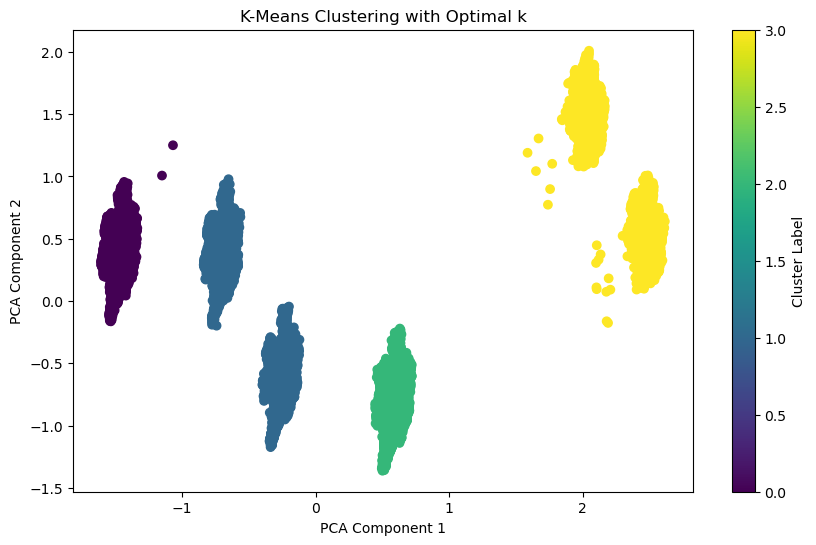

In [67]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
pca_data = pca.fit_transform(final_data_encoded_df)

plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=final_labels, cmap='viridis')
plt.title('K-Means Clustering with Optimal k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [68]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(final_data_encoded_df)
    inertia.append(kmeans.inertia_)

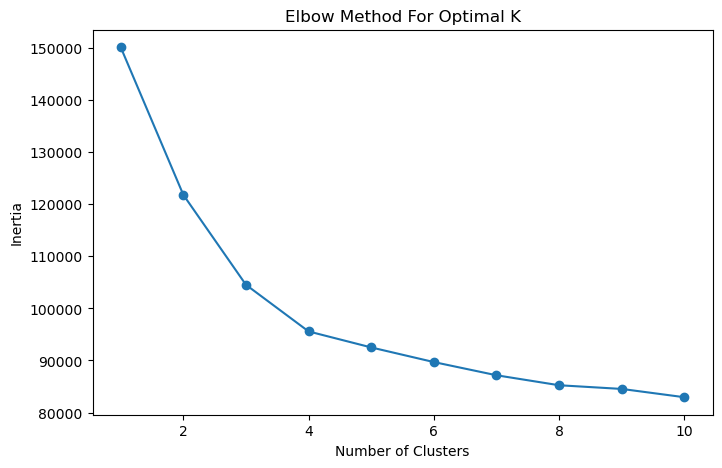

In [69]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()

In [70]:
final_data_encoded_df['kmeans_cluster'].value_counts()

kmeans_cluster
2    7096
0    6106
1    5710
3    3533
Name: count, dtype: int64

In [71]:
final_data_encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22445 entries, 0 to 22444
Data columns (total 72 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   activity_type_dataplus                         22445 non-null  float64
 1   activity_type_dualpane                         22445 non-null  float64
 2   activity_type_externalquiz                     22445 non-null  float64
 3   activity_type_folder                           22445 non-null  float64
 4   activity_type_forumng                          22445 non-null  float64
 5   activity_type_glossary                         22445 non-null  float64
 6   activity_type_homepage                         22445 non-null  float64
 7   activity_type_quiz                             22445 non-null  float64
 8   activity_type_resource                         22445 non-null  float64
 9   gender_F                                       224

_____________________

## Mahmoud - Trying to use engagement columns only in clustering

In [72]:
engagement_columns = [
    'assessment_engagement_score',
    'module_engagement_rate',
    'weighted_engagement',
    'engagement_consistency',
    'learning_pace',
    'engagement_dropoff',
    'activity_diversity'
]



In [73]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

best_score = -1
best_k = 0
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(final_data_encoded_df[engagement_columns])
    score = silhouette_score(final_data_encoded_df[engagement_columns], labels)
    print(f'For k = {k}, Silhouette Score = {score}')
    if score > best_score:
        best_score = score
        best_k = k

print(f'Best k: {best_k}, Best Silhouette Score: {best_score}')

For k = 2, Silhouette Score = 0.46659699095740986
For k = 3, Silhouette Score = 0.38995380089423665
For k = 4, Silhouette Score = 0.4041515604246246
For k = 5, Silhouette Score = 0.3422360828150818
For k = 6, Silhouette Score = 0.35689492037994536
For k = 7, Silhouette Score = 0.34042116952446816
Best k: 2, Best Silhouette Score: 0.46659699095740986


In [74]:
kmeans = KMeans(n_clusters=3, random_state=42)
final_labels = kmeans.fit_predict(final_data_encoded_df[engagement_columns])

final_data_encoded_df['kmeans_cluster'] = final_labels

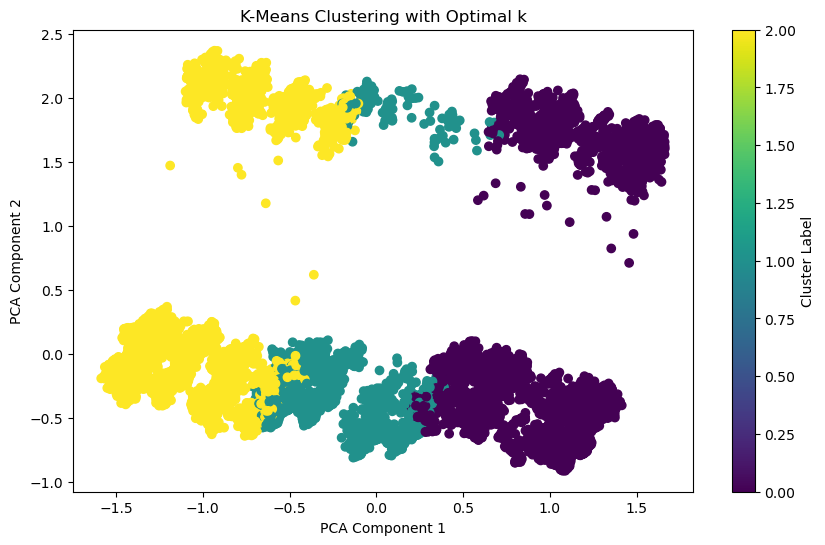

In [75]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, random_state=42)
pca_data = pca.fit_transform(final_data_encoded_df)

plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=final_labels, cmap='viridis')
plt.title('K-Means Clustering with Optimal k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

In [76]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(final_data_encoded_df[engagement_columns])
    inertia.append(kmeans.inertia_)

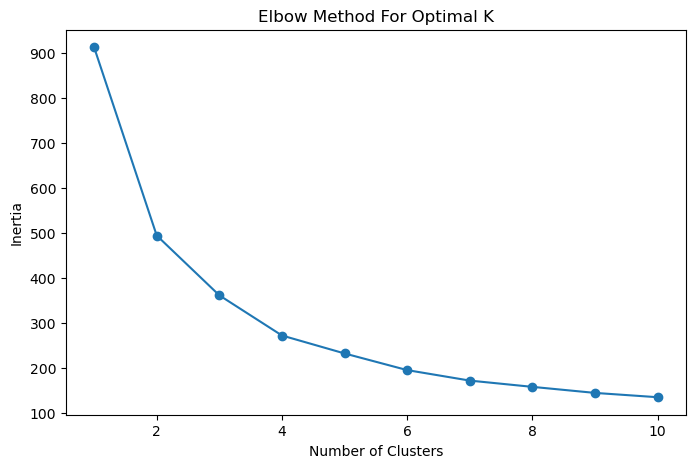

In [77]:
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()

In [78]:
final_data_encoded_df['kmeans_cluster'].value_counts()

kmeans_cluster
0    10115
2     8886
1     3444
Name: count, dtype: int64

In [79]:
for col in engagement_columns:
    print(pd.DataFrame(final_data_encoded_df.groupby('kmeans_cluster')[col].describe()))


                  count      mean       std       min       25%       50%  \
kmeans_cluster                                                              
0               10115.0  0.002605  0.006178  0.000000  0.000258  0.000862   
1                3444.0  0.047791  0.071313  0.001019  0.014132  0.025703   
2                8886.0  0.009492  0.013806  0.000019  0.001921  0.004927   

                     75%       max  
kmeans_cluster                      
0               0.002524  0.151266  
1               0.049790  1.000000  
2               0.011304  0.152354  
                  count      mean       std       min       25%       50%  \
kmeans_cluster                                                              
0               10115.0  0.040499  0.035284  0.000000  0.016222  0.031133   
1                3444.0  0.203081  0.118650  0.034317  0.125903  0.171749   
2                8886.0  0.083882  0.054117  0.003806  0.043845  0.072933   

                     75%       max  
kmeans

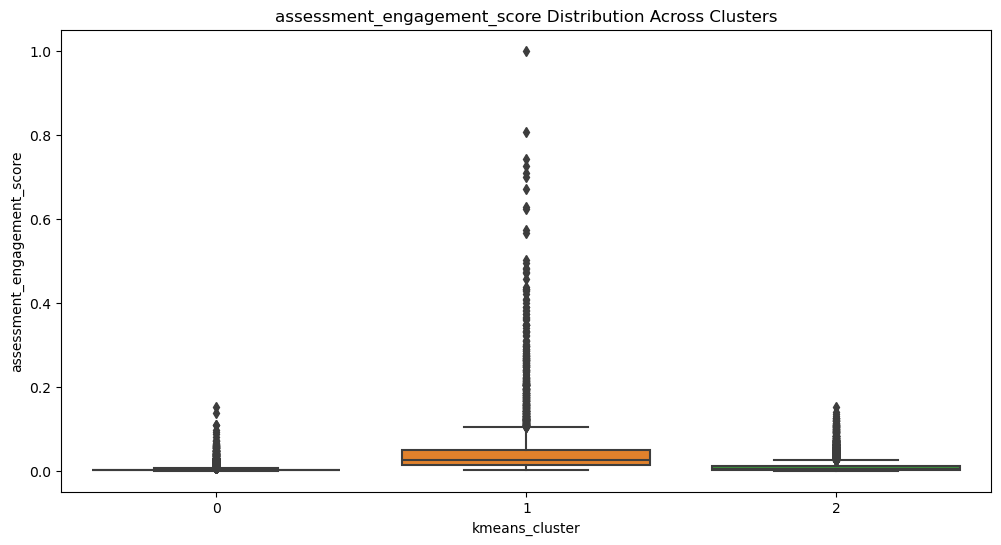

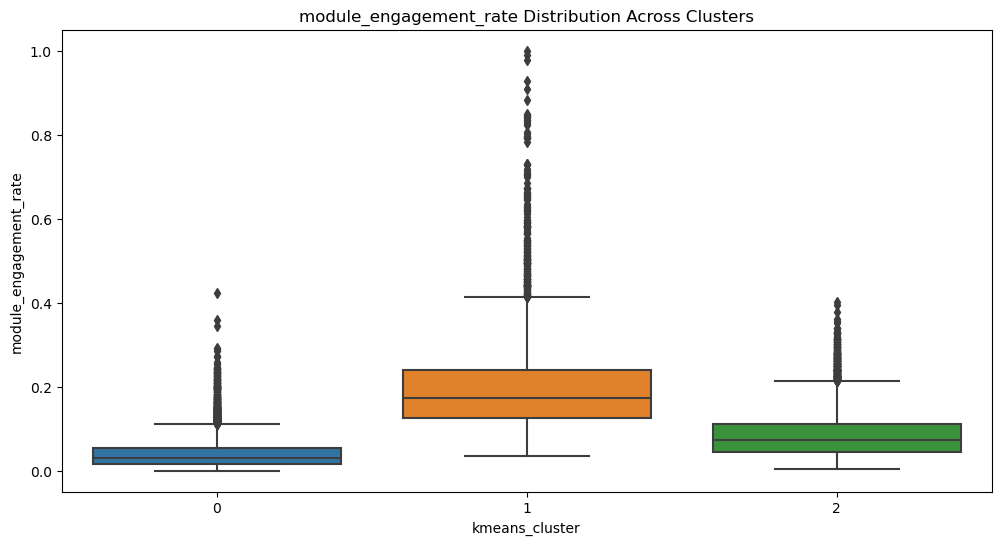

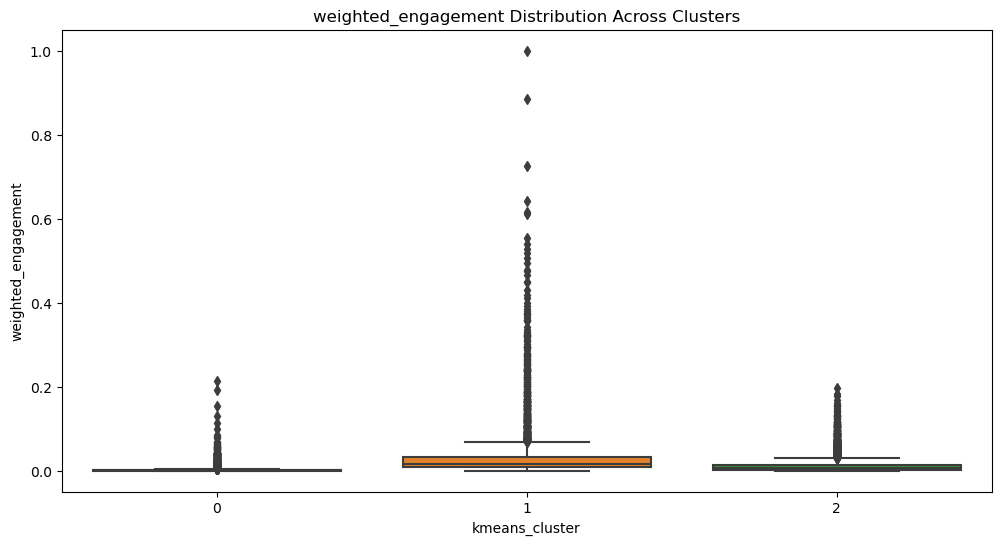

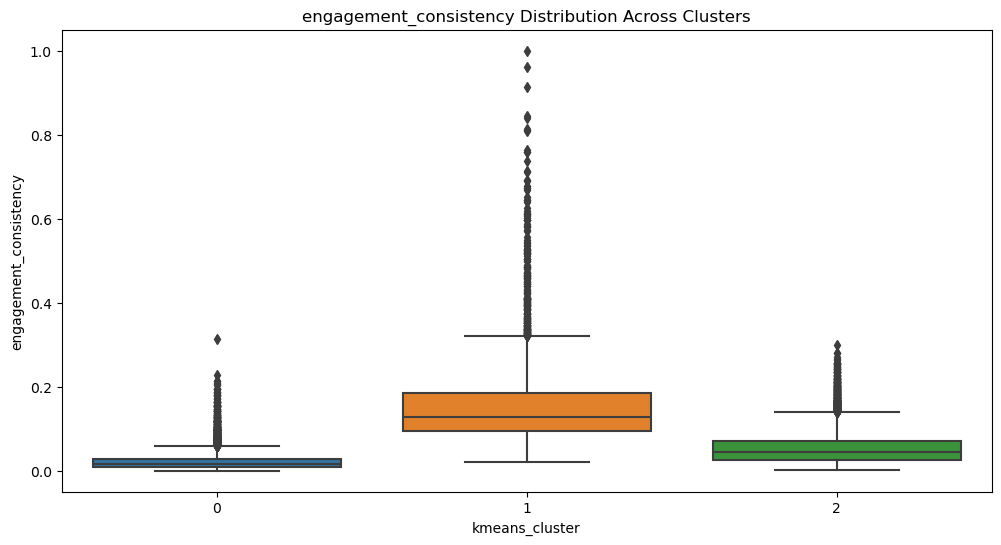

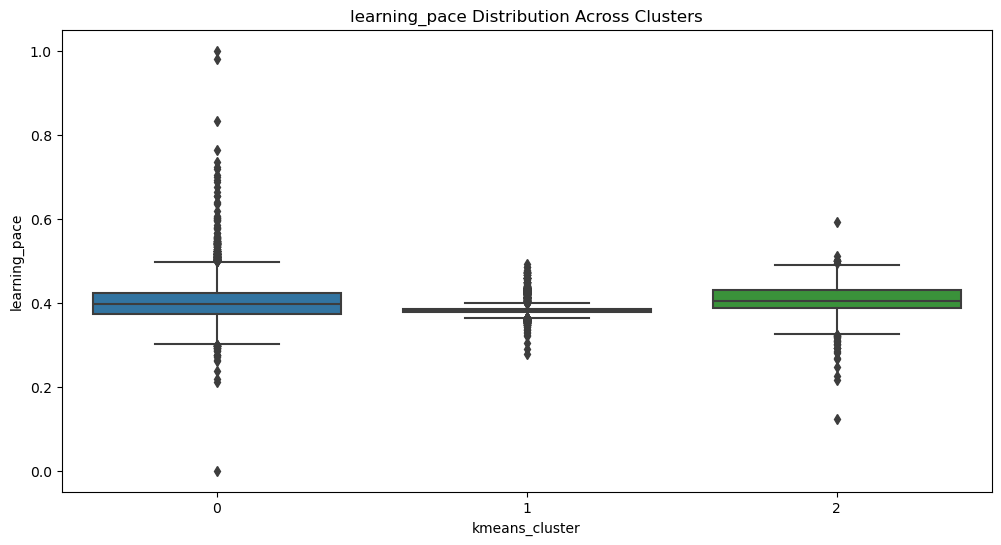

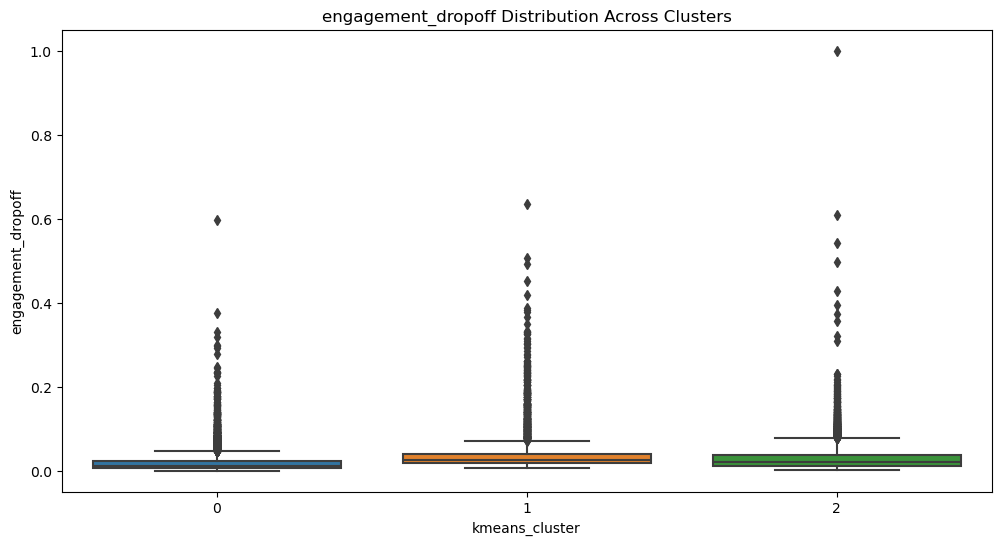

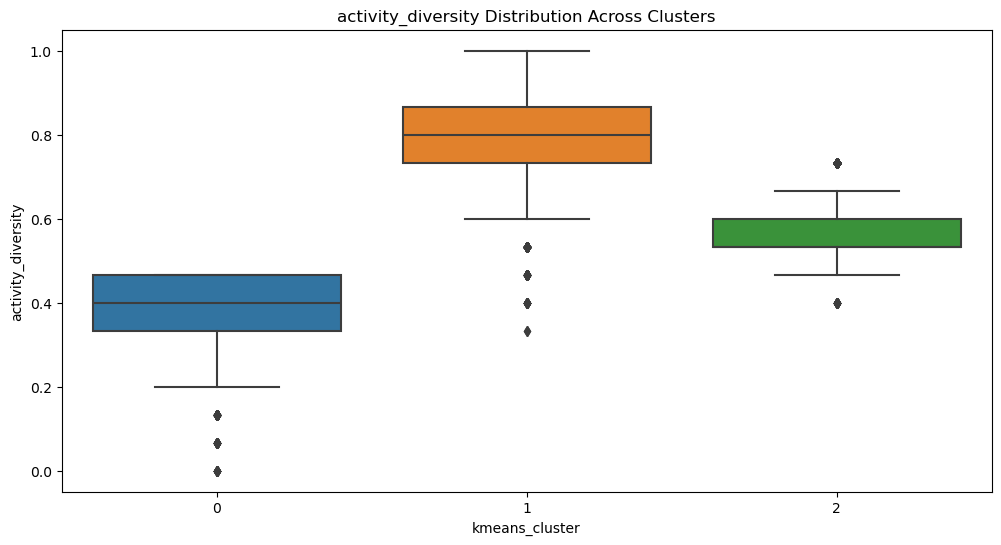

In [80]:
for col in engagement_columns:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='kmeans_cluster', y=col, data=final_data_encoded_df)
    plt.title(f'{col} Distribution Across Clusters')
    plt.show()



assessment_engagement_score - ANOVA p-value: nan
module_engagement_rate - ANOVA p-value: nan
weighted_engagement - ANOVA p-value: nan
engagement_consistency - ANOVA p-value: nan
learning_pace - ANOVA p-value: nan
engagement_dropoff - ANOVA p-value: nan
activity_diversity - ANOVA p-value: nan


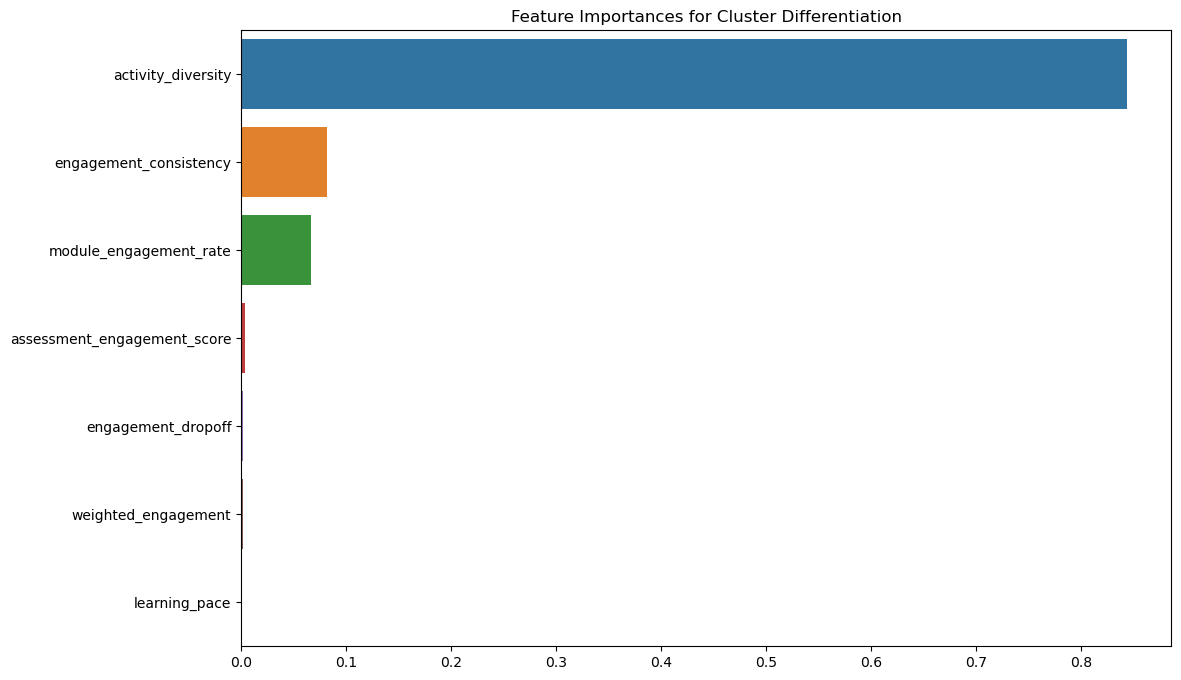

In [81]:
from scipy import stats
from sklearn.tree import DecisionTreeClassifier

for col in engagement_columns:
    f_stat, p_value = stats.f_oneway(*[final_data_encoded_df[final_data_encoded_df['kmeans_cluster'] == i][col] for i in range(4)])  # Adjust range if number of clusters is different
    print(f'{col} - ANOVA p-value: {p_value}')

X = final_data_encoded_df[engagement_columns]
y = final_data_encoded_df['kmeans_cluster']

model = DecisionTreeClassifier(random_state=42)
model.fit(X, y)

feature_importances = pd.Series(model.feature_importances_, index=engagement_columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importances for Cluster Differentiation')
plt.show()

In [82]:
df=final_data_encoded_df.copy()

In [83]:
engagement_columns = [
    'assessment_engagement_score', 'module_engagement_rate', 'weighted_engagement',
    'engagement_consistency', 'learning_pace', 'engagement_dropoff', 'activity_diversity'
]

cluster_summary = df.groupby('kmeans_cluster')[engagement_columns].describe().unstack()
cluster_summary

                                    kmeans_cluster
assessment_engagement_score  count  0                 10115.000000
                                    1                  3444.000000
                                    2                  8886.000000
                             mean   0                     0.002605
                                    1                     0.047791
                                                          ...     
activity_diversity           75%    1                     0.866667
                                    2                     0.600000
                             max    0                     0.466667
                                    1                     1.000000
                                    2                     0.733333
Length: 168, dtype: float64

In [84]:
df['average_engagement'] = df[engagement_columns].mean(axis=1)

def classify_engagement(row):
    if row['average_engagement'] > df['average_engagement'].quantile(0.75):
        return 'High Engagement'
    elif row['average_engagement'] < df['average_engagement'].quantile(0.25):
        return 'Low Engagement'
    else:
        return 'Moderate Engagement'

df['engagement_classification'] = df.apply(classify_engagement, axis=1)

In [85]:
df.engagement_classification.value_counts()

engagement_classification
Moderate Engagement    11223
High Engagement         5611
Low Engagement          5611
Name: count, dtype: int64

In [86]:
classification_summary = df.groupby(['kmeans_cluster', 'engagement_classification']).size().unstack(fill_value=0)
classification_summary

engagement_classification,High Engagement,Low Engagement,Moderate Engagement
kmeans_cluster,,,
0,102,5605,4408
1,3440,0,4
2,2069,6,6811


_________________

__________

In [ ]:
df = pd.concat([df,study_method],axis=1)
df.head()

In [ ]:
df.info()

In [ ]:
df['engagement_classification'].value_counts()

In [ ]:
df["study_method_preference"].value_counts()

In [ ]:
method_mapping = {
    'Collaborative': 0,
    'Offline Content': 1,
    'Interactive': 2,
    'Informational': 3,
    'Resource-Based': 4
}

# Apply the mapping to the 'study_method_preference' column
df['study_method_preference'] = df['study_method_preference'].map(method_mapping)

# Verify the changes
print(df['study_method_preference'].value_counts())

In [ ]:
le = LabelEncoder()
df['engagement_classification'] = le.fit_transform(df["engagement_classification"])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = df.drop(columns='study_method_preference')
y = df['study_method_preference'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, f1_score

In [ ]:
Svc_model = SVC(C = 1, kernel = 'linear')
logistic_model = LogisticRegression(C = 1, solver = 'lbfgs')
Knn_model = KNeighborsClassifier(n_neighbors = 7)
Naive_model = GaussianNB()
dt_model = DecisionTreeClassifier(random_state = 42)
rf_model = RandomForestClassifier(random_state = 42)
adaboost_model = AdaBoostClassifier(random_state = 42)
gradientboost_model = GradientBoostingClassifier(random_state = 42)
xgboost_model = XGBClassifier(random_state=42)

In [ ]:
X_train

In [ ]:
models = {
    'SVM': Svc_model,
    'Logistic Regression': logistic_model,
    'KNN': Knn_model,
    'GaussianNB': Naive_model,
    'Decision Tree': dt_model,
    'Random Forest': rf_model,
    'AdaBoost': adaboost_model,
    'GradientBoost': gradientboost_model
}

# Initialize dictionaries to store accuracies
train_accuracies = {}
test_accuracies = {}

train_f1scores = {}
test_f1scores = {}

for model_name, model in models.items():
        model.fit(X_train, y_train)

        train_predictions = model.predict(X_train)
        test_predictions = model.predict(X_test)

        train_accuracy = accuracy_score(y_train, train_predictions)
        test_accuracy = accuracy_score(y_test, test_predictions)

        train_f1score = f1_score(y_train, train_predictions, average='weighted')
        test_f1score = f1_score(y_test, test_predictions,average='weighted')
        

        train_accuracies[f'{model_name}'] = train_accuracy
        test_accuracies[f'{model_name}'] = test_accuracy

        train_f1scores[f'{model_name}'] = train_f1score
        test_f1scores[f'{model_name}'] = test_f1score
        
        
        print(model_name)
        print('Classification Report for train')
        print(classification_report(y_train, train_predictions))
        print('Classification Report for test')
        print(classification_report(y_test, test_predictions))
        print('-'*50)

# Create a DataFrame to display the results
results_df = pd.DataFrame({
    'Model': list(train_accuracies.keys()),
    'Train Accuracy': list(train_accuracies.values()),
    'Test Accuracy': list(test_accuracies.values()),
    'Train F1score': list(train_f1scores.values()),
    'Test F1score': list(test_f1scores.values())
})

In [ ]:
results_df = results_df.sort_values(by='Test F1score', ascending=False)
results_df

In [ ]:
#from sklearn.model_selection import GridSearchCV

#param_grid = {
#    'C': [0.1, 1, 10, 100],
#    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
#    'gamma': ['scale', 'auto']
#}

#grid_search = GridSearchCV(estimator=svc_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
#grid_search.fit(X_train, y_train)

#print("Best parameters found: ", grid_search.best_params_)

# Best estimator from grid search
#best_svc_model = grid_search.best_estimator_

# Make predictions using the best model
#y_pred = best_svc_model.predict(X_test)

# Evaluate the model
#accuracy = accuracy_score(y_test, y_pred)
#report = classification_report(y_test, y_pred)

#print(f"Accuracy: {accuracy}")
#print("Classification Report:")
#print(report)

In [ ]:
from sklearn.svm import SVC
svc_model = SVC(C=10, gamma='scale', kernel='linear', random_state=42)
svc_model.fit(X_train, y_train)

In [ ]:
print("Training Report")
y_pred_train = svc_model.predict(X_train)
print(classification_report(y_train,y_pred_train))

# Predict and Evaluate Models
print("\n Testing Report")
y_pred = svc_model.predict(X_test)
print(classification_report(y_test, y_pred))

In [ ]:
cm=confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [ ]:
cm

In [ ]:
import plotly.graph_objects as go

cm = confusion_matrix(y_test, y_pred)

fig = go.Figure(data=go.Heatmap(
    z=cm,
    colorscale='Blues',
    colorbar=dict(title='Count'),
    zmin=0
))

fig.update_layout(
    title='Confusion Matrix Heatmap',
    xaxis_title='Predicted Label',
    yaxis_title='True Label'
)

fig.show()

In [ ]:
print("Train Acc:",round(accuracy_score(y_train,y_pred_train),2),"%")
print("Test Acc:",round(accuracy_score(y_test,y_pred),2),"%")

In [ ]:
# Saving the model (RF)
import joblib
joblib.dump(clf, 'clf.pkl')

In [ ]:
# Saving the model (SVC)
joblib.dump(svc_model, 'SVC.pkl')

In [ ]:
data = pd.concat([df,ids], axis=1)
data.to_csv("data.csv")

In [ ]:
def recommend_learning_path(student_id):
    # Concatenate the DataFrame and IDs
    recomend_data = pd.concat([df, ids], axis=1)
    
    # Get the data for the specific student
    student_data = recomend_data[recomend_data['id_student'] == student_id]
    
    # Check if student exists in the data
    if student_data.empty:
        return "Student not found."
    
    # Remove unnecessary columns for prediction
    student_data.drop(columns=['id_student', 'study_method_preference'], inplace=True)
    
    # Predict the study method preference
    predicted_label = svc_model.predict(student_data)
    
    # Extract engagement level
    engagement = student_data["engagement_classification"].iloc[0]
    
    # Recommendations based on study method and engagement
    recommendations = {
        0: {  # Collaborative
            0: ["Interactive AI Basics: Weekly Quizzes and Forums","Applied AI: Practical Exercises with Peer Feedback"
               ,"Introduction to Machine Learning: Online Workshops","AI Ethics: Case Studies and Discussion Groups"],  # Moderate Engagement
            1: ["Collaborative AI Projects: Team-Based Learning","Advanced AI Techniques: Group Workshops and Peer Reviews"
               ,"Machine Learning Bootcamp: Intensive Group Projects","AI in Practice: Team Challenges and Hackathons"],      # High Engagement
            2: ['Introduction to AI: Self-Paced Fundamentals', 'AI Basics: Introductory Video Series',
                'Foundations of Machine Learning: Self-Study Edition','AI for Everyone: Introductory Readings and Quizzes'] # Low Engagement
        },
        1: {  # Offline Content
            0: ["AI Principles: Self-Study with Case Studies", "Machine Learning: Offline Course with Practice Problems",
                "Applied AI: Textbook and Supplementary Materials", "Data Science: Case Studies and Analytical Exercises"], # Moderate Engagement
            1: ["Advanced AI: Comprehensive Textbook with Projects", "Deep Learning: In-Depth Study with Capstone Projects",
               "AI and Machine Learning: Project-Based Learning", "Data Science Mastery: Offline Content with Comprehensive Projects"], # High Engagement
            2: ['AI Basics: Essential Readings and Key Concepts', 'Machine Learning Fundamentals: Self-Study Workbook',
               "AI Concepts: Downloadable Lecture Series", "Introduction to Data Science: Offline Learning Modules"] # Low Engagement
        },
        2: {  # Interactive
            0: ["Machine Learning: Interactive Coding Exercises", "AI Applications: Interactive Case Studies",
               "Data Science: Interactive Projects and Peer Reviews", "AI Ethics: Discussion Forums and Interactive Scenarios"], # Moderate Engagement
            1: ["Advanced AI: Interactive Group Projects and Hackathons", "Deep Learning: Interactive Labs and Collaborative Projects",
               "Machine Learning Mastery: Interactive Workshops and Challenges","AI Research: Collaborative Research Projects and Peer Feedback"], # High Engagement
            2: ["AI Basics: Interactive Quizzes and Flashcards", "Introduction to Machine Learning: Interactive Visualizations",
               "AI Fundamentals: Interactive Notebooks", "AI Concepts: Gamified Learning Modules"] # Low Engagement
        },
        3: {  # Informational
            0: ["Machine Learning: Structured Video Course", "AI Concepts: Comprehensive Video Series",
               "Data Science: Interactive Reading and Video Modules", "AI in Practice: Lecture Notes and Case Studies"], # Moderate Engagement
            1: ["Advanced AI: Detailed Lecture Series and Readings", "Deep Learning: Advanced Lecture Series with Supplemental Readings",
               "AI and Machine Learning: Research Papers and Advanced Lectures", "Data Science Masterclass: Comprehensive Reading and Video Content"], # High Engagement
            2: ["AI Overview: Short Video Lectures", "Introduction to Machine Learning: Podcast Series",
               "AI Fundamentals: Infographics and Summaries", "Data Science: Essential Readings and Articles"] # Low Engagement
        },
        4: {  # Resource-Based
            0: ["Machine Learning: Comprehensive eBooks and Guides", "AI Applications: Case Study Compilations",
               "Data Science: In-Depth Articles and White Papers", "AI Concepts: Research Articles and Detailed Guides"], # Moderate Engagement
            1: ["Advanced AI: Research Papers and Technical Reports", "Deep Learning: Comprehensive Textbooks and Resource Repositories",
               "Machine Learning Mastery: Advanced Documentation and APIs", "AI Ethics: Government and Institutional Reports"], # High Engagement
            2: ["AI Basics: Curated Reading Lists", "Introduction to Machine Learning: Beginner-Friendly Blogs",
               "Data Science Overview: Quick Reference Guides", "AI Fundamentals: Online Documentation"] # Low Engagement
        }
    }
    
    # Determine study method and engagement level
    study_method = predicted_label[0]
    engagement_level = engagement.iloc[0] if isinstance(engagement, pd.Series) else engagement
    
    # Get the recommended courses based on study method and engagement level
    recommended_courses = recommendations.get(study_method, {}).get(engagement_level, [])

    return recommended_courses, study_method, engagement_level

In [ ]:
def return_map_to_original_preference(x):
    if x == 0:
        return 'Collaborative'
    elif x == 1:
        return 'Offline Content'
    elif x == 2:
        return 'Interactive'
    elif x==3:
        return 'Informational'
    elif x==4:
        return 'Resource-Based'

In [ ]:
def return_map_to_original_engagement(x):
    if x == 0:
        return 'Moderate Engagement'
    elif x == 1:
        return 'High Engagement'
    elif x == 2:
        return 'Low Engagement'

In [ ]:
data.sample(1)[["id_student","study_method_preference","engagement_classification"]]

In [ ]:
# Get recommendations for a student
student_id = 677111

recommendations, study_method, engegement = recommend_learning_path(student_id)
study_method = return_map_to_original_preference(study_method)
engegement = return_map_to_original_engagement(engegement)

print(f"Study method preference for student {student_id}: {study_method}")
print(f"Level of engagement for student {student_id}: {engegement}")
print(f"Recommended courses for student {student_id}: {recommendations}")

In [ ]:
# Get recommendations for a student
student_id = 645019

recommendations, study_method, engegement = recommend_learning_path(student_id)
study_method = return_map_to_original_preference(study_method)
engegement = engegement.apply(return_map_to_original_engagement).iloc[0]

print(f"Study method preference for student {student_id}: {study_method}")
print(f"Level of engagement for student {student_id}: {engegement}")
print(f"Recommended courses for student {student_id}: {recommendations}")